

# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this project, we'll analyze information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. We'll analyize the changes that happened in the movies making process, the directors contribution and the financial aspects of the industry.
>
> we'll answer questions like:

The first 2 questions are analyzing the changes that happened to the movies over the years (Movie runtime, Movies production volume)<br>
    1-What is the average runtime over the years? <br>
    2-How many movies were produced each year? <br>
<br>
Then we can analyize the directors contribution in the movie industry<br>
    3-Who are the top 10 directors in this dataset? <br>
<br>
Finally we'll analyize the financial point of view of the movies(Revenues and budgets)<br>
    4-What are the movies with the highest revenue? <br>
    5-What are the movies with the highest budget? <br>


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we'll load in the data and assess it and check for any data that needs to be cleaned.

### General Properties

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset and checking the first few rows.

In [103]:

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We checked the first 5 rows of the dataset and it seems like there are few columns that we'll not use in our analysis

In [104]:
df.shape 

(10866, 21)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

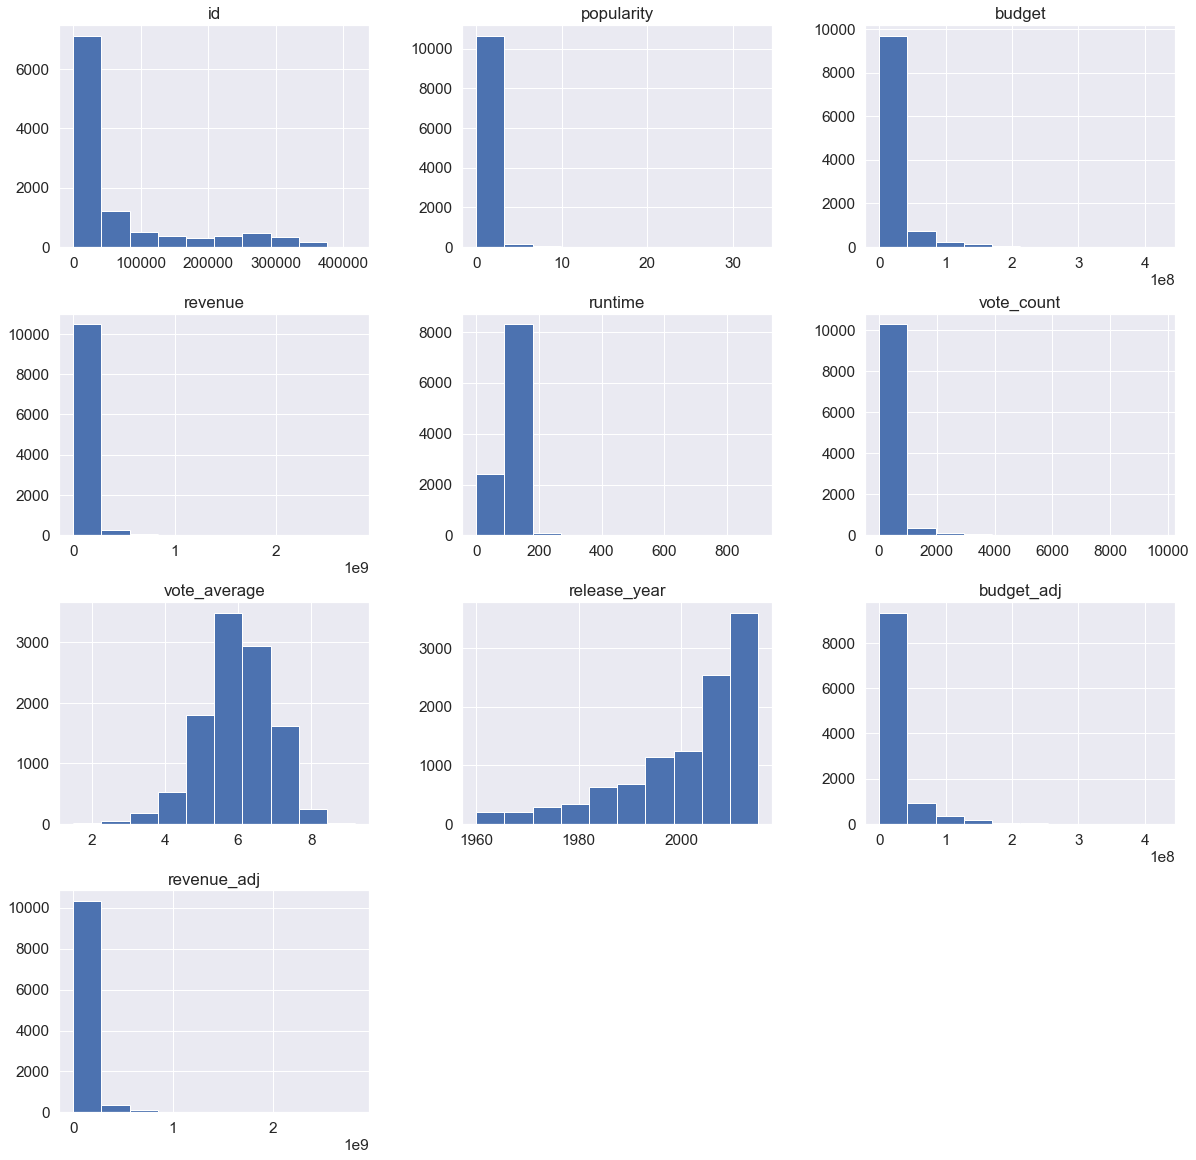

In [105]:
df.hist(figsize=(20,20))

In the following code we'll check if there are any duplicates 

In [106]:

df.duplicated().sum()


1

In [107]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Let's check if there are any missing values and how many 

In [108]:

df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Looks like we have a lot of missing values in several columns that we need to clean 

we'll have a look on the describtion of the data set

In [109]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It appears that in the budget and revenue columns almost 50% of the data is "0"



### Data Cleaning 

After looking at the data turns out that we have: <br>
1-duplicate row that needs to be dropped

2-null values that needs to be dropped or filled with mean/median

3-columns that won't help with the analysis that we need to drop

4-about 50% of the budget and revenue values are 0, that needs to be replaced with median values


first will drop the columns we won't use

In [110]:

df.drop(['id','imdb_id','popularity','homepage','tagline','overview','vote_count','production_companies','budget_adj','revenue_adj'], axis=1, inplace=True)
df.head()

,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,7.3,2015


we'll drop the duplicate row now, and check the duplicates again to make sure it's dropped 

In [111]:

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


Let's check the missing values after removing the columns we won't use

In [112]:
df.isnull().sum() 

budget               0
revenue              0
original_title       0
cast                76
director            44
keywords          1493
runtime              0
genres              23
release_date         0
vote_average         0
release_year         0
dtype: int64

We'll drop the null data as it's all strings so we can't replace with median


In [113]:
df.dropna(inplace=True)
print(df.isnull().sum())

budget            0
revenue           0
original_title    0
cast              0
director          0
keywords          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
dtype: int64


In [114]:
df.shape

(9306, 11)

we need to replace the '0' values in budget and revenue columns with the median, since it's almost 50% of the values if we dropped it we'll lose have the data 

In [115]:

df['budget'] = df['budget'].replace(0, df['budget'].median())
df['revenue'] = df['revenue'].replace(0, df['revenue'].median())
df.describe()

,budget,revenue,runtime,vote_average,release_year
count,9.306000e+03,9.306000e+03,9306.000000,9306.000000,9306.000000
mean,1.672229e+07,4.590105e+07,103.414249,6.000355,2000.419514
std,3.260421e+07,1.250529e+08,28.376247,0.909980,13.068678
min,1.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,3.500000e+05,0.000000e+00,91.000000,5.400000,1993.000000
50%,3.500000e+05,0.000000e+00,100.000000,6.100000,2005.000000
75%,2.000000e+07,3.378094e+07,113.000000,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions we have

### Research Question 1 (How many movies were produced each year?)

we need to get the count of movies for each year to see what type of changes happened over the years, to do that lets get the value_counts() for the release year which will give us how many movies were produced eacch year, then we'll use a chart to visualize it

1960     30
1961     29
1962     32
1963     33
1964     42
1965     34
1966     45
1967     36
1968     36
1969     26
1970     38
1971     54
1972     38
1973     55
1974     44
1975     42
1976     45
1977     55
1978     62
1979     55
1980     77
1981     76
1982     79
1983     76
1984    101
1985     96
1986    113
1987    110
1988    128
1989    123
1990    128
1991    118
1992    125
1993    169
1994    173
1995    162
1996    188
1997    184
1998    195
1999    205
2000    204
2001    217
2002    231
2003    233
2004    271
2005    327
2006    365
2007    372
2008    409
2009    444
2010    379
2011    435
2012    441
2013    503
2014    545
2015    473
Name: release_year, dtype: int64

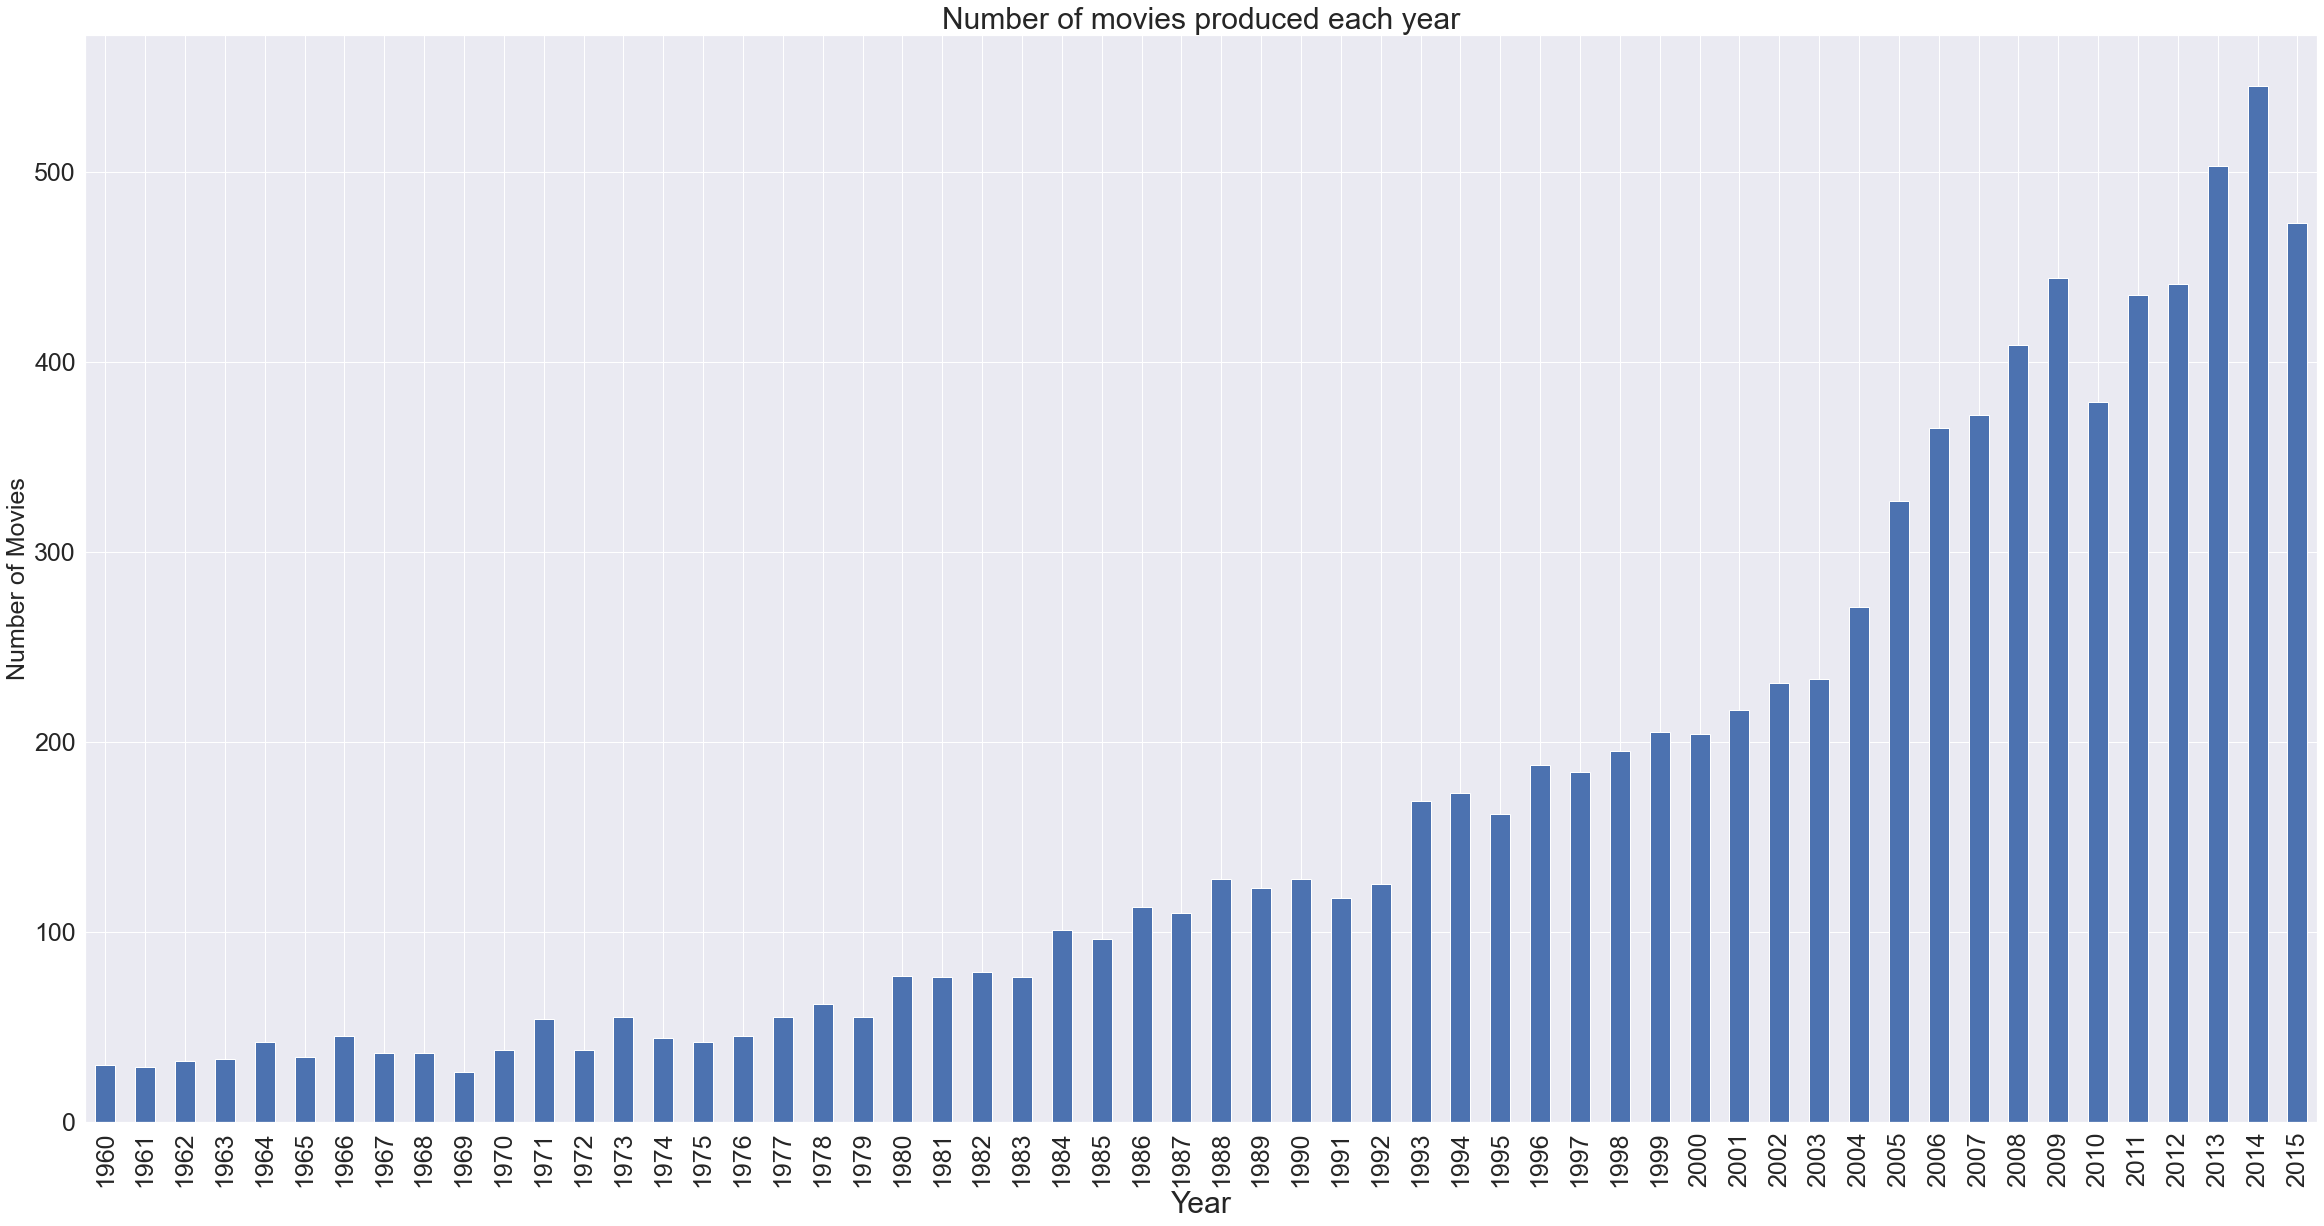

In [116]:

df.release_year.value_counts().sort_index().plot.bar(figsize = (40,20), fontsize= 25)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Number of Movies', fontsize = 25)
plt.title('Number of movies produced each year', fontsize= 30)
df.release_year.value_counts().sort_index()

In this chart we see how the movies production volum has increased over the years from less than 100 movies a year up to more that 500 movies in 2014

### Research Question 2  (What is the average runtime throughout the years?)

To answer this qustions we need to get the mean runtime for the movies for each year to see how it has changed 

release_year
1960    111.766667
1961    121.137931
1962    124.343750
1963    112.060606
1964    109.214286
1965    118.029412
1966    108.711111
1967    108.222222
1968    113.500000
1969    111.653846
1970    114.263158
1971    107.962963
1972    102.868421
1973    103.527273
1974    108.409091
1975    107.500000
1976    110.000000
1977    108.290909
1978    109.919355
1979    112.236364
1980    107.272727
1981    106.434211
1982    103.227848
1983    102.986842
1984    104.603960
1985    105.822917
1986    100.477876
1987    101.300000
1988    103.250000
1989    106.178862
1990    106.125000
1991    106.033898
1992    107.976000
1993    108.295858
1994    107.346821
1995    106.265432
1996    106.361702
1997    106.978261
1998    105.553846
1999    108.721951
2000    104.504902
2001    108.576037
2002    105.865801
2003    105.570815
2004    103.590406
2005    103.880734
2006    103.104110
2007    100.572581
2008    101.454768
2009     98.993243
2010    101.419525
2011    100.708046

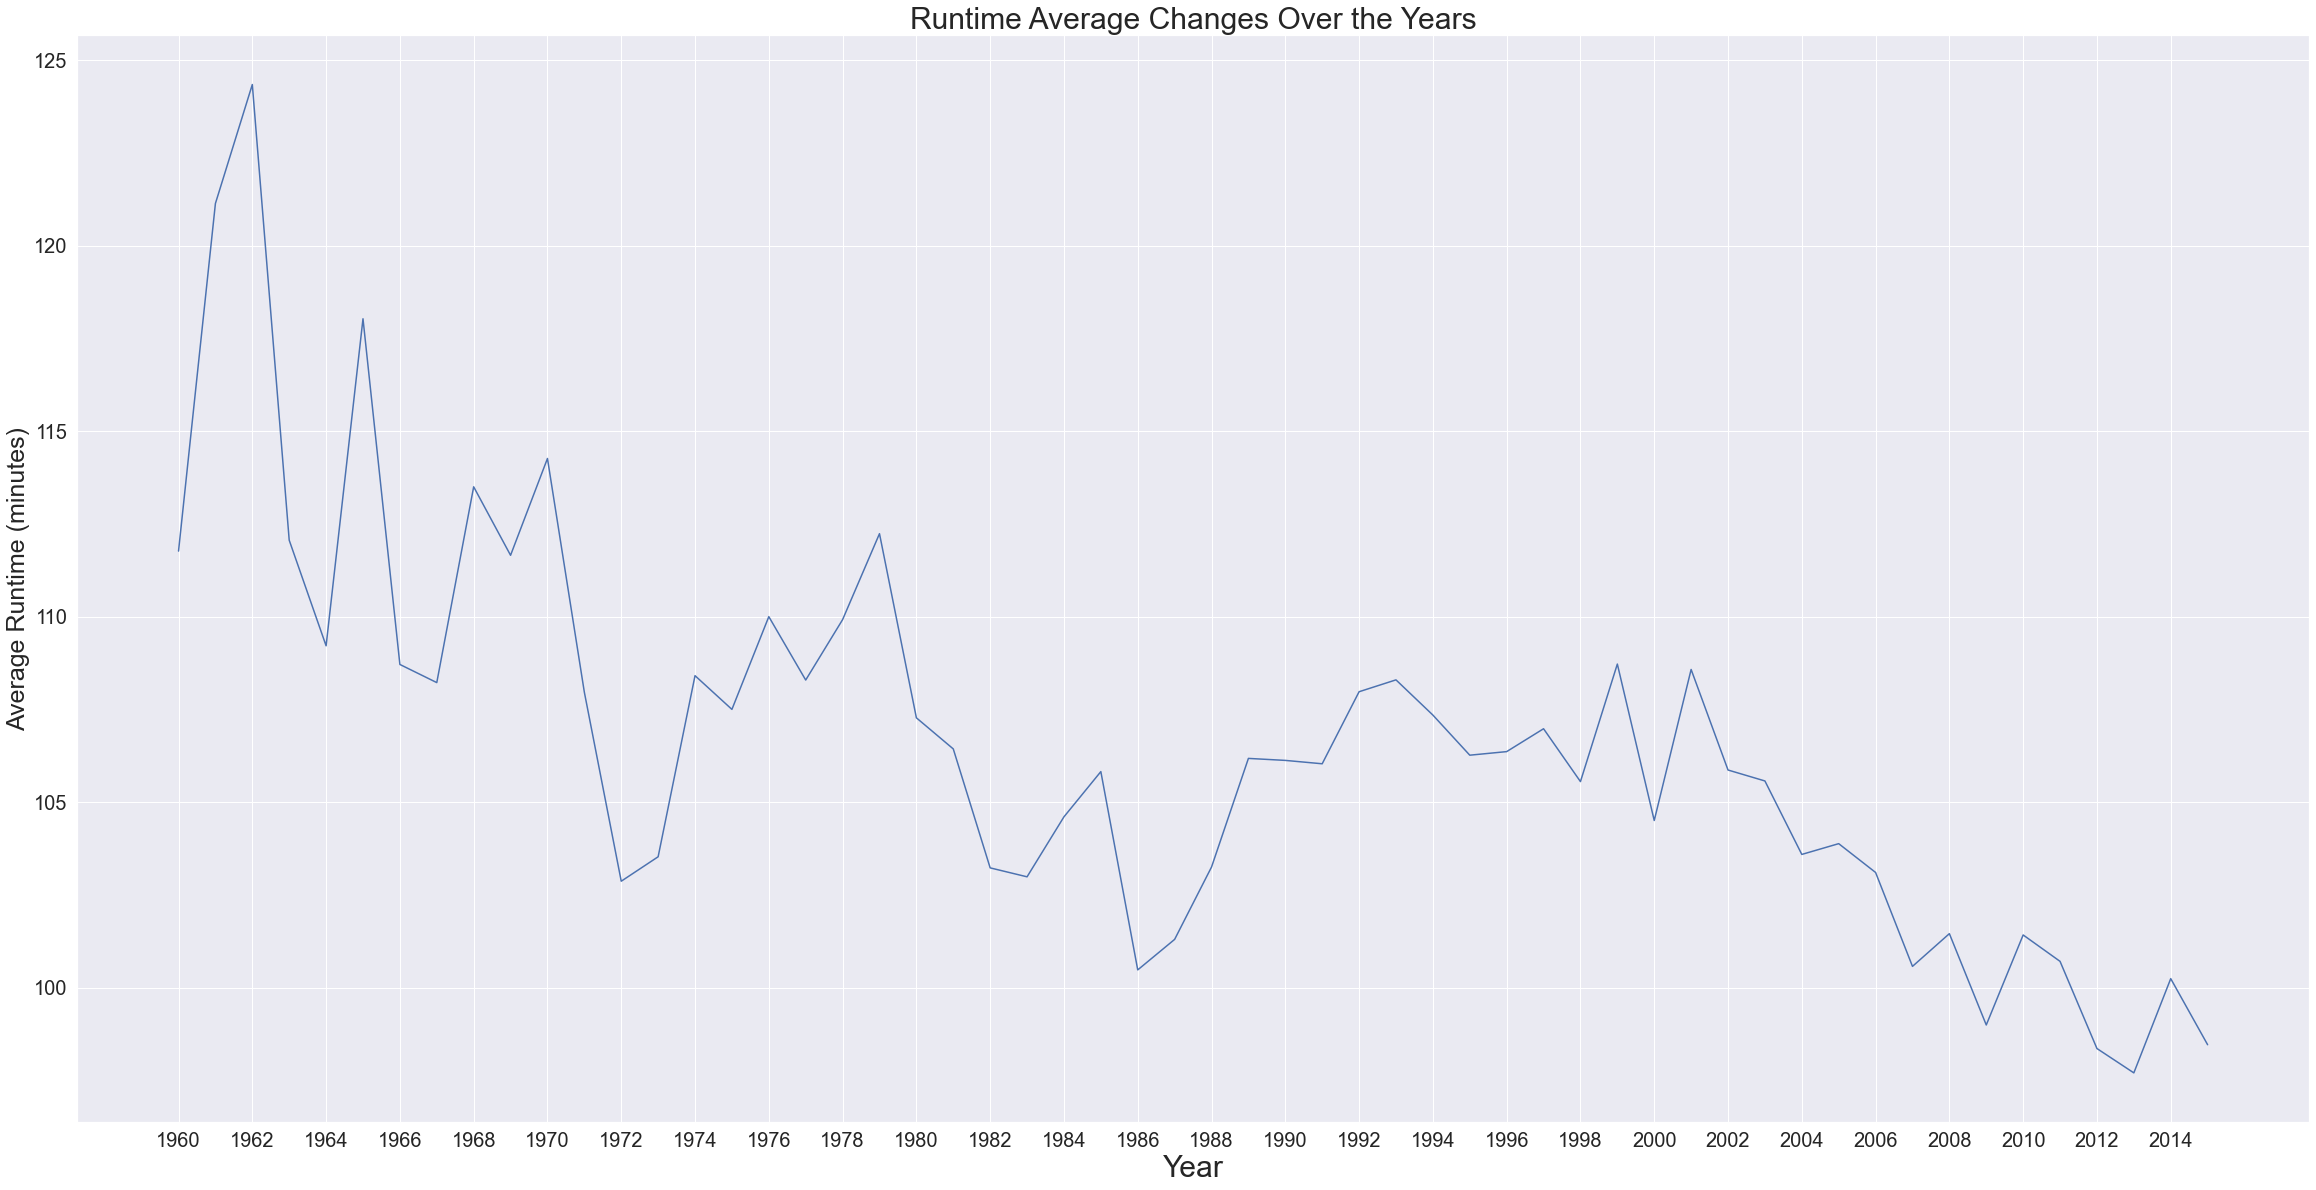

In [117]:
#to get the average runtime by year, we'll use groupby
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,2),figsize=(40,20), fontsize=20)

plt.xlabel('Year', fontsize = 30)
plt.ylabel('Average Runtime (minutes)', fontsize = 25)
plt.title('Runtime Average Changes Over the Years', fontsize= 30)

df.groupby('release_year').mean()['runtime']

From our analysis we see that on the contrary of the movie volum getting higher ove the years, here we have the average runtime of the movies shortening from average runtime of 112 minutes in 1960 to average runtime of 98 minutes in 2014

### Research Question 3  (Who are the top 10 directors in this dataset?)


In this question we'll analyze the directors contribution for the movies industry by checking how many movies had been directed by each director, and then take the top 10 directors with the most movies directed. we can get that byusing the value_counts() for the director column

Woody Allen          43
Clint Eastwood       33
Steven Spielberg     29
Martin Scorsese      28
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      20
Brian De Palma       19
Barry Levinson       19
Name: director, dtype: int64

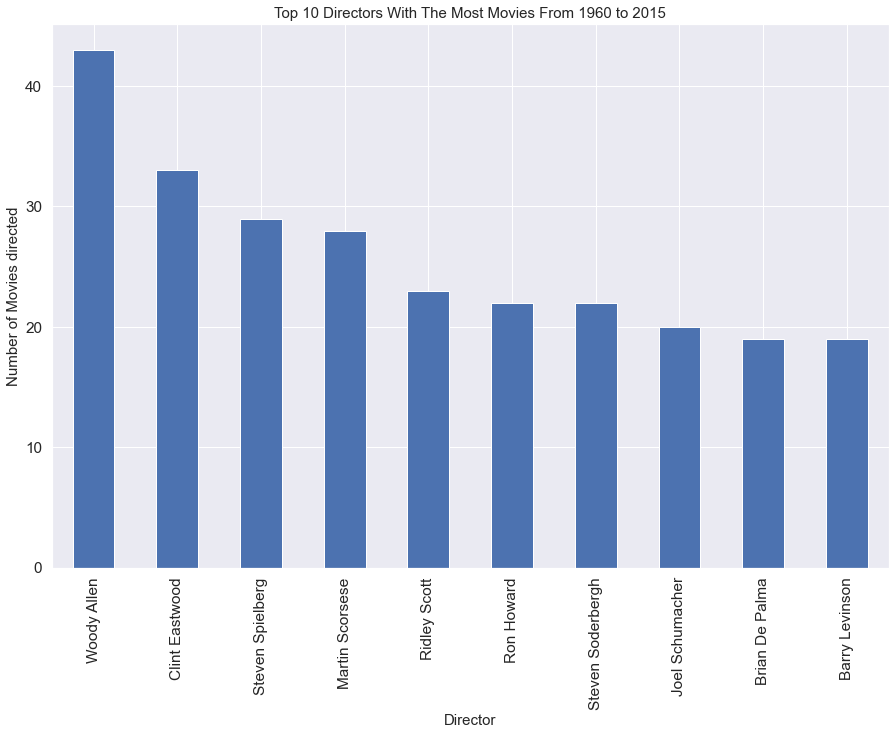

In [118]:

df['director'].value_counts().head(10).plot.bar(figsize=(15,10))
plt.xlabel('Director',fontsize= 15)
plt.ylabel('Number of Movies directed',fontsize= 15)
plt.title('Top 10 Directors With The Most Movies From 1960 to 2015',fontsize= 15)
df['director'].value_counts().head(10)

As we can see from our analysis that these are the top 10 directors who cotributed to the movie industry from 1960 till 2015 and the director with most movies in our dataset is Woody Allen with total of 43 movies 

### Research Question 4  (What are the movies with the highest revenue?)


For this question we are going to see what are the top 10 movies that has gained the highest revenues from the year 1960 to 2015

first to make our analysis easier we're going to creat a function that creats a plot for the first 10 rows 

In [119]:
def plotting(df, col, xlabel, ylabel, title):
    plt.barh(df.sort_values(by=col, ascending=False).head(10).original_title,
          df.sort_values(by=col, ascending=False).head(10)[col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


first  let's gather the columns we'll use together to make our plotting easier 

In [120]:
movies_revenue = df[['original_title','revenue']]

Let's call our function

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


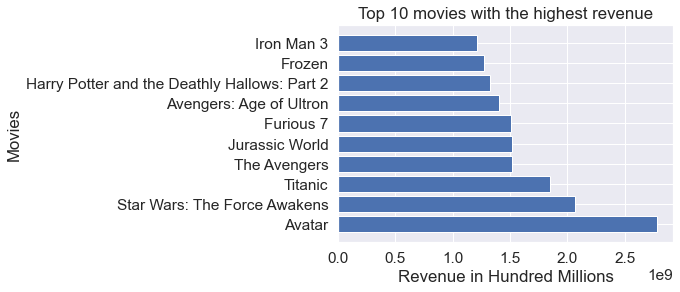

In [121]:
plotting(movies_revenue,'revenue', 'Revenue in Hundred Millions','Movies', 'Top 10 movies with the highest revenue')
movies_revenue.sort_values(by= 'revenue', ascending=False).head(10)

as we see here these are the movies that gained the most revenue in the dataset, and that Avatar released in 2009 is the most profitable movie between the years 1960 to 2015

### Research Question 5  (What are the movies with the highest budget?)

For this question we are going to see what are the top 10 movies that has costed the highest budgets from the year 1960 to 2015

first  let's gather the columns we'll use together to make our plotting easier 

In [96]:
movies_budget = df[['original_title','budget']]

Let's look at this data's chart

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
1389,Harry Potter and the Half-Blood Prince,250000000


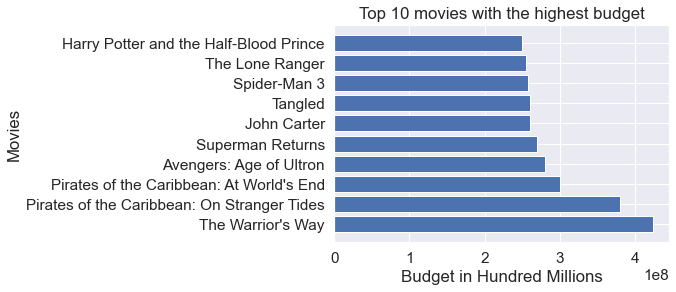

In [122]:
plotting(movies_budget,'budget', 'Budget in Hundred Millions','Movies', 'Top 10 movies with the highest budget')
movies_budget.sort_values(by= 'budget', ascending=False).head(10)

<a id='conclusions'></a>
## Conclusions

Through investigating the dataset we find that:  <br> 
The number of movies produced each year has been growing from less than 100 movies a year up to more that 500 movies in 2014
On the contrary we find that the average run time of movies has declined over the years  <br>
We can also tell that the most successful director is 'Woody Allen' having directed the most movies throughout the years   <br>
We found out also that the movie that costed the biggest budget was "The Warrior's Way" released in 2010  <br>
while the most profitable movie is "Avatar" realeased in 2009



## Limitations:<br>
This dataset unfortunately had an issue with the revenue and budget data, more than 50% of data's value was 0 which might have affected the analysis, but can be solved with gathering more data 